# Ungraded Lab: MNIST Deep Autoencoder

Welcome back! In this lab, you will extend the shallow autoencoder you built in the previous exercise. The model here will have a deeper network so it can handle more complex images.

## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

2025-02-10 12:38:48.464919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-10 12:38:48.480463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739187528.490360   20095 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739187528.493180   20095 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 12:38:48.504294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Prepare the Dataset

You will prepare the MNIST dataset just like in the previous lab.

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

I0000 00:00:1739187531.665021   20095 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9826 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


## Build the Model

As mentioned, you will have a deeper network for the autoencoder. Compare the layers here with that of the shallow network you built in the previous lab.

In [4]:
def deep_autoencoder(inputs):
  '''Builds the encoder and decoder using Dense layers.'''
  encoder = tf.keras.layers.Dense(units=128, activation='relu')(inputs)
  encoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(encoder)

  decoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  decoder = tf.keras.layers.Dense(units=128, activation='relu')(decoder)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(decoder)

  return encoder, decoder

# set the input tensor
inputs =  tf.keras.Input(shape=(784,))

# get the encoder and decoder output
deep_encoder_output, deep_autoencoder_output = deep_autoencoder(inputs)

# setup the encoder because you will visualize its output later
deep_encoder_model = tf.keras.Model(inputs=inputs, outputs=deep_encoder_output)

# setup the autoencoder
deep_autoencoder_model = tf.keras.Model(inputs=inputs, outputs=deep_autoencoder_output)

## Compile and Train the Model

In [5]:
train_steps = 60000 // BATCH_SIZE

deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50


2025-02-10 12:38:57.448540: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1739187537.524809   20219 service.cc:148] XLA service 0x7f88b0002000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739187537.524844   20219 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-02-10 12:38:57.547093: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739187537.669136   20219 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-10 12:38:58.381617: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_224', 24 bytes spill stores, 24 bytes spill loads

2025-02-1

 61/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4656

I0000 00:00:1739187541.084953   20219 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2745
Epoch 2/50


2025-02-10 12:39:02.994693: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_224', 12 bytes spill stores, 12 bytes spill loads

2025-02-10 12:39:03.063241: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_224', 80 bytes spill stores, 96 bytes spill loads

2025-02-10 12:39:03.239722: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_252', 112 bytes spill stores, 160 bytes spill loads

2025-02-10 12:39:03.793782: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_245', 168 bytes spill stores, 168 bytes spill loads



468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1344
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1173
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1100
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1051
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1016
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0993
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0971
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0952
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0937
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0923
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0908
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0897
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0889
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0882
Epoch 16/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0877

## Display sample results

See the results using the model you just trained.

In [6]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


2025-02-10 12:40:02.341434: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-10 12:40:02.342429: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-10 12:40:02.374885: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


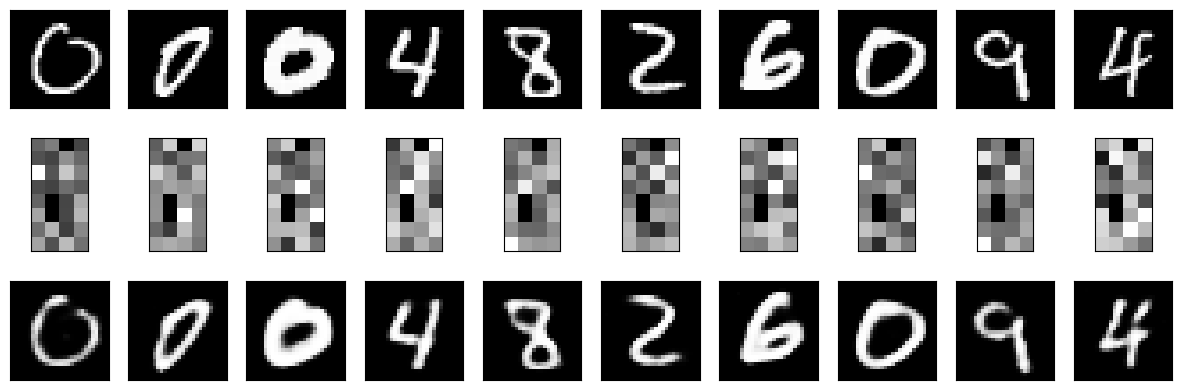

In [7]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = deep_encoder_model.predict(test_dataset)

# get a prediction for the test batch
deep_predicted = deep_autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])